# ANALYZING THE DIFFERENT NEIGHBOURHOODS OF LONDON TO OPEN A SUPERMARKET

# AIM
### To analyze the various neighbourhoods of london and to find a suitable area with the low number of supermarkets to start a new one to maximize the profits.

### Step 1 - IMPORTING THE REQUIRED LIBRARIES

In [54]:
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json

import requests 
from pandas.io.json import json_normalize 

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium

from bs4 import BeautifulSoup
import csv

!pip install geocoder
import geocoder 

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

!conda install -c conda-forge folium=0.5.0 --yes
import folium 
import numpy as np
from pandas.io.json import json_normalize


Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



### Step 2 - Importing Data From Wikipedia

In [2]:
source = requests.get('https://en.wikipedia.org/wiki/Category:Areas_of_London').text 
soup = BeautifulSoup(source, 'lxml')

### Step 3 - Converting Data into CSV

In [3]:
csv_file = open('london.csv', 'w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['Neighbourhood'])

15

In [4]:
mwcg = soup.find_all(class_ = "mw-category-group")

length = len(mwcg)

for i in range(1, length):
    lists = mwcg [i].find_all('a')
    for list in lists:
        nbd = list.get('title') 
        csv_writer.writerow([nbd]) 

In [5]:
csv_file.close()

In [6]:
london_raw = pd.read_csv('london.csv')

### Step 4 - Checking the numbers of neighbourhoods

In [7]:
london_raw.shape

(357, 1)

In [8]:
london_raw

,Neighbourhood
0,"Category:Acton, London"
1,Category:Aldwych
2,Category:Balham
3,"Category:Barking, London"
4,"Category:Barnes, London"
5,Category:Barnsbury
6,Category:Bayswater
7,Category:Beckton
8,Category:Belgravia
9,Category:Belsize Park


### Step 5 - Importing Geographical Co-ordinates

In [9]:
lat = []
lng = []
lat_lng_coords = None

neighbourhoods = london_raw['Neighbourhood']
for nh in neighbourhoods:
    g = geocoder.arcgis('{}, london, UK'.format(nh))
    lat_lng_coords = g.latlng
    lat.append(lat_lng_coords[0])
    lng.append(lat_lng_coords[1])

In [10]:
london_data = london_raw
london_data['Latitude'] = lat
london_data['Longitude'] = lng

In [55]:
london_data.head(10)

,Neighbourhood,Latitude,Longitude
0,"Category:Acton, London",51.513240,-0.267460
1,Category:Aldwych,51.512653,-0.118607
2,Category:Balham,51.448220,-0.148390
3,"Category:Barking, London",51.544690,-0.144540
4,"Category:Barnes, London",51.474570,-0.242120
5,Category:Barnsbury,51.472930,-0.166525
6,Category:Bayswater,51.510480,-0.184260
7,Category:Beckton,51.532920,0.054610
8,Category:Belgravia,51.497050,-0.152750
9,Category:Belsize Park,51.546903,-0.172820


### Step 6 - Entering Foursquare Credentials

In [12]:
CLIENT_ID = 'KD13UQVTMLKNYFPNMZD5SFHB2ICBD5PDJWHVPSNQD4YNOXIC' 
CLIENT_SECRET = 'FKJZPBE1FU3QX5HUR1BBBG0LWHR223VQTABWK1PVZ5YYR1WR'
VERSION = '20200714' 

### Step 7 - Plotting the map of London from the data obtained from Foursquare

In [17]:
from geopy.geocoders import Nominatim

address = 'London, UK'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [19]:
london_map = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label in zip(london_data['Latitude'], london_data['Longitude'], london_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(london_map)  
    
london_map

### Step 8 - Importing the Various Categories in each neighbourhood from Foursquare

In [20]:
def get_category_type(row):
    categories_list = row['Category']  
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [22]:
explore_df_list = []

for i, nhood_name in enumerate(london_data['Neighbourhood']):  
    
    try :
        nhood_name = london_data.loc[i, 'Neighbourhood']
        nhood_lat = london_data.loc[i, 'Latitude']
        nhood_lng = london_data.loc[i, 'Longitude']

        radius = 1000 
        LIMIT = 30 

        url = 'https://api.foursquare.com/v2/venues/explore?client_id={} \
        &client_secret={}&ll={},{}&v={}&radius={}&limit={}'\
        .format(CLIENT_ID, CLIENT_SECRET, nhood_lat, nhood_lng, VERSION, radius, LIMIT)

        results = json.loads(requests.get(url).text)
        results = results['response']['groups'][0]['items']

        nearby = json_normalize(results)
        filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
        nearby = nearby.loc[:, filtered_columns]
        columns = ['Name', 'Category', 'Latitude', 'Longitude']
        nearby.columns = columns

        nearby['Category'] = nearby.apply(get_category_type, axis=1)    

        for i, name in enumerate(nearby['Name']):
            s_list = nearby.loc[i, :].values.tolist()  # Converts the numpy array to a python list
            f_list = [nhood_name, nhood_lat, nhood_lng] + s_list
            explore_df_list.append(f_list)
    
    except Exception as e:
        pass

### Step 9 - Creating a complete dataframe pre-clustering

In [56]:
complete_london = pd.DataFrame([item for item in explore_df_list])
complete_london.columns = ['Neighbourhood', 'Neighbourhood Latitude', 'Neighbourhood Longitude', 'Venue Name', 'Venue Category', 'Venue Latitude', 'Venue Longitude']
complete_london.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue Name,Venue Category,Venue Latitude,Venue Longitude
0,"Category:Acton, London",51.51324,-0.26746,London Star Hotel,Hotel,51.509624,-0.272456
1,"Category:Acton, London",51.51324,-0.26746,MrBakeme,Creperie,51.508452,-0.268543
2,"Category:Acton, London",51.51324,-0.26746,The Station House,Pub,51.508877,-0.263076
3,"Category:Acton, London",51.51324,-0.26746,Acton Centre,Gym / Fitness Center,51.506608,-0.266878
4,"Category:Acton, London",51.51324,-0.26746,Acton Park,Park,51.508595,-0.261573


### Step 10 - Performing One hot Encoding to the complete data

In [57]:
london_1hot = pd.get_dummies(complete_london[['Venue Category']], prefix="", prefix_sep="")
london_1hot['Neighbourhood'] = complete_london['Neighbourhood'] 
fixed_columns = [london_1hot.columns[-1]] + london_1hot.columns[:-1].values.tolist()
london_1hot = london_1hot[fixed_columns]

london_1hot.head()

,Neighbourhood,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Garage,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Betting Shop,Bike Shop,Bistro,Boat Rental,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Café,Camera Store,Campground,Canal,Canal Lock,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Caucasian Restaurant,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Cigkofte Place,Circus School,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Roaster,Coffee Shop,College Football Field,College Quad,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cricket Ground,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hockey Field,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Hunan Restaurant,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Nightclub,North Indian Restaurant,Office,Okonomiyaki Restaurant,Opera House,Optical Shop,Organic Grocery,Outdoor Gym,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Outlet Mall,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Pet Café,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pier,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Post Office,Print Shop,Pub,Rafting,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Road,Rock Club,Roller Rink,Roof Deck,Rugby Pitch,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Science Museum,Scottish Restaurant,Sculpture Garden,Seafood Restaurant,Shaanxi Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shop & Service,Shopping Ma

In [25]:
london_grouped = london_1hot.groupby('Neighbourhood').mean().reset_index()
london_grouped.head()

,Neighbourhood,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Garage,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Betting Shop,Bike Shop,Bistro,Boat Rental,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Café,Camera Store,Campground,Canal,Canal Lock,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Caucasian Restaurant,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Cigkofte Place,Circus School,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Roaster,Coffee Shop,College Football Field,College Quad,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cricket Ground,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hockey Field,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Hunan Restaurant,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Nightclub,North Indian Restaurant,Office,Okonomiyaki Restaurant,Opera House,Optical Shop,Organic Grocery,Outdoor Gym,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Outlet Mall,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Pet Café,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pier,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Post Office,Print Shop,Pub,Rafting,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Road,Rock Club,Roller Rink,Roof Deck,Rugby Pitch,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Science Museum,Scottish Restaurant,Sculpture Garden,Seafood Restaurant,Shaanxi Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shop & Service,Shopping Ma

### Step 11 - Finding the top 10 venues in each neighbourhood

In [26]:
def top_common_venues(row, top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:top_venues]

In [29]:
top_venues = 10
indicators = ['st', 'nd', 'rd']
columns = ['Neighbourhood']
for ind in np.arange(top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = london_grouped['Neighbourhood']
for ind in np.arange(london_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = top_common_venues(london_grouped.iloc[ind, :], top_venues)

neighbourhoods_venues_sorted.head(10)

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbey Wood,Supermarket,Grocery Store,Pub,Train Station,Convenience Store,Historic Site,Coffee Shop,Lake,Fish & Chips Shop,Farm
1,Aberfeldy Village,Coffee Shop,Hotel,Park,Italian Restaurant,Sandwich Place,Gym / Fitness Center,Café,Movie Theater,Pool,Business Service
2,"Acton Green, London",Coffee Shop,Gastropub,Pub,French Restaurant,Bakery,Park,Burger Joint,Mediterranean Restaurant,Middle Eastern Restaurant,Supermarket
3,"Acton Vale, London",Coffee Shop,Gastropub,Pub,French Restaurant,Bakery,Park,Burger Joint,Mediterranean Restaurant,Middle Eastern Restaurant,Supermarket
4,"Acton, London",Pub,Gym / Fitness Center,Coffee Shop,Grocery Store,Hotel,Park,Fast Food Restaurant,Train Station,Mini Golf,Sandwich Place
5,"Addington, London",Turkish Restaurant,Pub,Park,Restaurant,Italian Restaurant,Café,Pizza Place,Bakery,Deli / Bodega,Indian Restaurant
6,Addiscombe,Café,Yoga Studio,Thai Restaurant,Bakery,Climbing Gym,Coffee Shop,Park,Pub,Italian Restaurant,Spanish Restaurant
7,"Adelphi, London",Dessert Shop,Theater,Opera House,Ice Cream Shop,Shopping Plaza,Seafood Restaurant,Boutique,Event Space,Sushi Restaurant,Liquor Store
8,Agar Town,Turkish Restaurant,Supermarket,Coffee Shop,Grocery Store,Hotel,Pub,Kebab Restaurant,Sandwich Place,Middle Eastern Restaurant,Bar
9,"Albany Park, Bexley",Park,Train Station,Grocery Store,Golf Course,Yoga Studio,Farm,Fast Food Restaurant,Filipino Restaurant,Film Studio,Fish & Chips Shop


### Step 11 - CLUSTERING

In [30]:
london_grouped_clustering = london_grouped.drop('Neighbourhood', 1)

### Step 12 - Importing Mathplot to find the optimal number of clusters needed

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

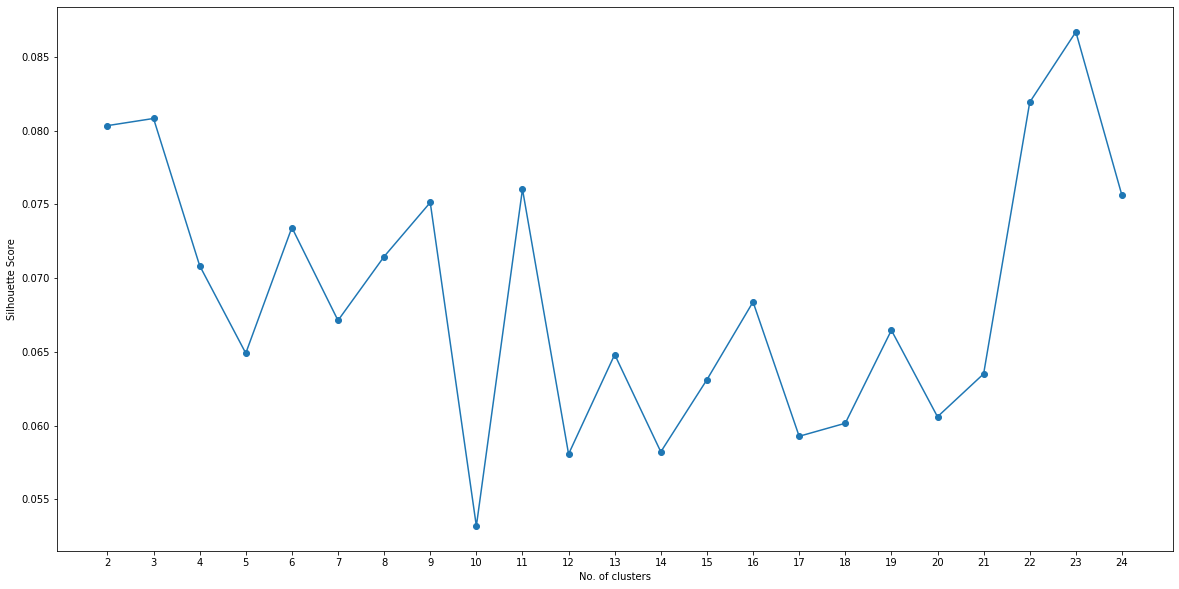

In [59]:
from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for london_clusters in range(2, 25) :
    
    london_gc = london_grouped_clustering
    kmeans = KMeans(n_clusters = london_clusters, init = 'k-means++', random_state = 0).fit_predict(london_gc)
    score = silhouette_score(london_gc, kmeans)
    indices.append(london_clusters)
    scores.append(score)
plot(max_range, scores, "No. of clusters", "Silhouette Score")    

### From the Plotted Graph, the optimal number of clusters was found as 10

### Step 13 - Creating a dataframe with all neccessary information

In [38]:
london_clusters = 10
london_gc = london_grouped_clustering
kmeans = KMeans(n_clusters = london_clusters, init = 'k-means++', random_state = 0).fit(london_gc)

In [39]:
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [40]:
london_final = london_data
london_final = london_final.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
london_final.dropna(inplace = True)
london_final['Cluster Labels'] = london_final['Cluster Labels'].astype(int)
london_final.head()

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Category:Acton, London",51.513240,-0.267460,8,Pub,Gym / Fitness Center,Coffee Shop,Grocery Store,Hotel,Park,Fast Food Restaurant,Train Station,Mini Golf,Sandwich Place
1,Category:Aldwych,51.512653,-0.118607,5,Theater,Dessert Shop,Restaurant,Coffee Shop,Hotel,Boutique,Opera House,Bakery,Outdoor Supply Store,Electronics Store
2,Category:Balham,51.448220,-0.148390,3,Pub,Pizza Place,Coffee Shop,Bakery,Italian Restaurant,Wine Shop,Historic Site,Butcher,Shop & Service,Moroccan Restaurant
3,"Category:Barking, London",51.544690,-0.144540,5,Pub,Ice Cream Shop,Market,Coffee Shop,Café,Flea Market,Street Food Gathering,Brewery,Burger Joint,Canal
4,"Category:Barnes, London",51.474570,-0.242120,8,Pub,Park,Grocery Store,Farmers Market,Pizza Place,Coffee Shop,Movie Theater,French Restaurant,Nature Preserve,Food & Drink Shop


### Step 14 - Creating visualisation of clusters in the map of London using Folium

In [41]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(london_clusters)
ys = [i + x + (i*x)**2 for i in range(london_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(london_final['Latitude'], london_final['Longitude'], london_final['Neighbourhood'], 
                                  london_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster + 1) + ')', parse_html=True)
    map_clusters.add_child(
        folium.features.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7))
       
map_clusters

### Step 15 - Finding data in Cluster 1

In [42]:
val = 1
london_final.loc[london_final['Cluster Labels'] == (val - 1), london_final.columns[[0] + np.arange(4, london_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
42,Category:Eastcote,Pub,Indian Restaurant,Music Venue,Café,Nightclub,Caribbean Restaurant,Food Court,Brewery,Gastropub,Bakery
77,"Category:Kilburn, London",Pub,Pizza Place,Brazilian Restaurant,Farmers Market,Bakery,Coffee Shop,Café,Cocktail Bar,Deli / Bodega,Middle Eastern Restaurant
139,Category:Tottenham,Pub,Supermarket,Train Station,Italian Restaurant,Soccer Stadium,Social Club,Sporting Goods Shop,Gas Station,Fast Food Restaurant,Mediterranean Restaurant
156,Category:Wood Green,Pub,Mediterranean Restaurant,Turkish Restaurant,Indian Restaurant,Clothing Store,Furniture / Home Store,Supermarket,Gift Shop,Bookstore,Gastropub
190,Barnsbury,Pub,Café,Gastropub,Mediterranean Restaurant,Movie Theater,Caucasian Restaurant,Cheese Shop,Fish Market,Korean Restaurant,Bookstore
201,Bedfont,Pub,Café,Kebab Restaurant,Eastern European Restaurant,Bakery,Bar,Coffee Shop,Ethiopian Restaurant,Sushi Restaurant,Supermarket
206,"Bellingham, London",Pub,Supermarket,Bus Stop,Soccer Stadium,Park,Train Station,Café,Brewery,Lounge,Greek Restaurant
208,"Belmont, Sutton",Pub,Train Station,Sports Club,Asian Restaurant,Flea Market,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Film Studio


### Step 16 - Finding data in Cluster 2

In [43]:
val = 2
london_final.loc[london_final['Cluster Labels'] == (val - 1), london_final.columns[[0] + np.arange(4, london_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Category:Bayswater,Hotel,Chinese Restaurant,Coffee Shop,Café,Garden,Greek Restaurant,Restaurant,Palace,Supermarket,Park
8,Category:Belgravia,Hotel,Plaza,Indian Restaurant,Boutique,Café,Burger Joint,Gastropub,Fast Food Restaurant,Event Space,Cocktail Bar
23,Category:Canning Town,Hotel,Hotel Bar,Restaurant,Italian Restaurant,Bed & Breakfast,Light Rail Station,Fast Food Restaurant,Farm,Rafting,Coffee Shop
80,"Category:Lee, London",Plaza,Park,Hotel,Garden,Fountain,Steakhouse,Boutique,Spanish Restaurant,Monument / Landmark,Multiplex
123,Category:St James's,Plaza,Bookstore,Ice Cream Shop,Art Museum,Hotel,Bike Shop,Fountain,Grocery Store,Park,Department Store
153,Category:Whitehall,Plaza,Hotel,Park,Garden,Café,Monument / Landmark,Outdoor Sculpture,Steakhouse,Boutique,Skate Park
168,Albertopolis,Hotel,Art Gallery,Pub,Middle Eastern Restaurant,Coffee Shop,Yoga Studio,Gym / Fitness Center,Pizza Place,Movie Theater,Korean Restaurant
178,"Ashburton, London",Hotel,Grocery Store,Italian Restaurant,Coffee Shop,Bar,Pub,Fast Food Restaurant,Scenic Lookout,Science Museum,Café
193,Bayswater,Hotel,Chinese Restaurant,Coffee Shop,Café,Garden,Greek Restaurant,Restaurant,Palace,Supermarket,Park
203,Belgravia,Hotel,Plaza,Indian Restaurant,Boutique,Café,Burger Joint,Gastropub,Fast Food Restaurant,Event Space,Cocktail Bar


### Step 17 - Finding data in Cluster 3

In [44]:
val = 3
london_final.loc[london_final['Cluster Labels'] == (val - 1), london_final.columns[[0] + np.arange(4, london_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Category:Belsize Park,Café,Dessert Shop,Bakery,Deli / Bodega,Movie Theater,Farmers Market,Market,Supermarket,Sushi Restaurant,Grocery Store
52,Category:Frognal,Café,Grocery Store,Creperie,Mediterranean Restaurant,Bar,Theater,Gym / Fitness Center,Supermarket,Farmers Market,Bookstore
53,Category:Fulham,Café,Yoga Studio,Bakery,Grocery Store,Park,Coffee Shop,Climbing Gym,Thai Restaurant,Pub,Supermarket
62,Category:Harringay,Turkish Restaurant,Café,Park,Bagel Shop,Bakery,Bar,Baseball Field,Tapas Restaurant,Butcher,Pub
65,Category:Herne Hill,Café,Pub,Park,Brewery,Bakery,Fish & Chips Shop,Farmers Market,Garden Center,English Restaurant,Pizza Place
66,Category:Highbury,Café,Seafood Restaurant,Pub,Restaurant,Wine Shop,Park,French Restaurant,Tennis Court,Tapas Restaurant,Sushi Restaurant
71,Category:Hornsey,Café,Coffee Shop,French Restaurant,Pub,Italian Restaurant,Bakery,Gym / Fitness Center,Greek Restaurant,Mediterranean Restaurant,Gastropub
85,Category:Maida Vale,Café,Pub,Garden,Canal,Plaza,Beer Bar,Garden Center,Movie Theater,Fast Food Restaurant,Bar
92,Category:Muswell Hill,Café,Gym / Fitness Center,Coffee Shop,Bakery,Skating Rink,Grocery Store,Greek Restaurant,Tapas Restaurant,Garden Center,Movie Theater
95,Category:North Kensington,Café,Italian Restaurant,Clothing Store,Burger Joint,Persian Restaurant,Gift Shop,Sushi Restaurant,Middle Eastern Restaurant,Tennis Court,Park


### Step 18 - Finding data in Cluster 4

In [45]:
val = 4
london_final.loc[london_final['Cluster Labels'] == (val - 1), london_final.columns[[0] + np.arange(4, london_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Category:Balham,Pub,Pizza Place,Coffee Shop,Bakery,Italian Restaurant,Wine Shop,Historic Site,Butcher,Shop & Service,Moroccan Restaurant
5,Category:Barnsbury,Pub,Italian Restaurant,Plaza,Café,Bakery,Coffee Shop,French Restaurant,Deli / Bodega,Garden Center,General College & University
12,Category:Bexleyheath,Pub,Clothing Store,Pharmacy,Grocery Store,Sandwich Place,Coffee Shop,Department Store,Plaza,Pizza Place,English Restaurant
16,Category:Bow Common,Pub,Coffee Shop,Canal Lock,Park,Pizza Place,Burger Joint,Go Kart Track,Bakery,Lebanese Restaurant,Fast Food Restaurant
17,"Category:Bow, London",Pub,Pizza Place,Café,Art Gallery,Coffee Shop,Grocery Store,Burger Joint,Wine Shop,Turkish Restaurant,Climbing Gym
19,Category:Bromley-by-Bow,Pub,Pizza Place,Café,Art Gallery,Coffee Shop,Grocery Store,Burger Joint,Wine Shop,Turkish Restaurant,Climbing Gym
58,Category:Hackney Central,Pub,Brewery,Bakery,Wine Shop,Cocktail Bar,Creperie,Historic Site,Movie Theater,Modern European Restaurant,Church
67,Category:Highgate,Pub,Café,Japanese Restaurant,Historic Site,French Restaurant,Gastropub,Park,Tea Room,Theater,Bakery
69,Category:Honor Oak,Pub,Café,Grocery Store,Coffee Shop,Pizza Place,Park,Fish & Chips Shop,Bar,Sandwich Place,Garden Center
74,Category:Isleworth,Pub,Bus Stop,Fast Food Restaurant,Pizza Place,Grocery Store,Gym,Café,Breakfast Spot,Hotel,River


### Step 19 - Finding data in Cluster 5

In [46]:
val = 5
london_final.loc[london_final['Cluster Labels'] == (val - 1), london_final.columns[[0] + np.arange(4, london_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Category:Bermondsey,Coffee Shop,Italian Restaurant,Bakery,Deli / Bodega,Cocktail Bar,Tapas Restaurant,Garden,French Restaurant,Food Truck,Distillery
13,"Category:Blackfriars, London",Coffee Shop,Falafel Restaurant,Hotel,Theater,Pub,History Museum,Pizza Place,Distillery,Cocktail Bar,Roof Deck
14,"Category:Blackwall, London",Hotel,Coffee Shop,Park,Lounge,Hotel Bar,Italian Restaurant,Pier,Fish Market,Gym / Fitness Center,English Restaurant
20,"Category:Brompton, London",Coffee Shop,History Museum,Pub,Japanese Restaurant,Hotel,Bookstore,Restaurant,English Restaurant,Clothing Store,Park
21,Category:Cambridge Heath,Coffee Shop,Flower Shop,Cocktail Bar,Hotel,French Restaurant,Pizza Place,Music Venue,Museum,Martial Arts Dojo,Market
40,Category:Districts of the City of London,Gym / Fitness Center,Indie Movie Theater,Café,Beer Bar,Coffee Shop,Hotel,Bike Shop,Bar,Theater,Taco Place
44,"Category:Edmonton, London",Pub,Hotel,Turkish Restaurant,Coffee Shop,Gym / Fitness Center,Grocery Store,Dry Cleaner,Sandwich Place,Mediterranean Restaurant,Middle Eastern Restaurant
47,"Category:Farringdon, London",Coffee Shop,Hotel,Pub,Wine Bar,Beer Bar,Gym / Fitness Center,Museum,Modern European Restaurant,French Restaurant,Flea Market
49,Category:Fitzrovia,Coffee Shop,Hotel,Italian Restaurant,French Restaurant,Pizza Place,Cocktail Bar,Bakery,Restaurant,Camera Store,Soup Place
64,Category:Hendon,Grocery Store,Coffee Shop,Gym / Fitness Center,Hotel,Pizza Place,Turkish Restaurant,Gastropub,Middle Eastern Restaurant,Park,Student Center


### Step 20 - Finding data in Cluster 6

In [47]:
val = 6
london_final.loc[london_final['Cluster Labels'] == (val - 1), london_final.columns[[0] + np.arange(4, london_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Category:Aldwych,Theater,Dessert Shop,Restaurant,Coffee Shop,Hotel,Boutique,Opera House,Bakery,Outdoor Supply Store,Electronics Store
3,"Category:Barking, London",Pub,Ice Cream Shop,Market,Coffee Shop,Café,Flea Market,Street Food Gathering,Brewery,Burger Joint,Canal
22,Category:Camden Town,Market,Vegetarian / Vegan Restaurant,Pizza Place,Ice Cream Shop,Burger Joint,Flea Market,Yoga Studio,Street Food Gathering,Canal,Sandwich Place
26,"Category:Chelsea, London",Ice Cream Shop,Bookstore,Plaza,Bakery,Women's Store,Café,Department Store,Farmers Market,Boxing Gym,Sandwich Place
30,Category:Chiswick,Bookstore,Coffee Shop,Ice Cream Shop,Sushi Restaurant,Café,Japanese Restaurant,Furniture / Home Store,Bar,Bakery,Persian Restaurant
31,Category:Clapham,Burger Joint,Pub,Yoga Studio,Deli / Bodega,Steakhouse,Butcher,Café,Skate Park,Coffee Shop,Restaurant
33,Category:Covent Garden,Theater,Dessert Shop,Coffee Shop,Liquor Store,Electronics Store,Burger Joint,Seafood Restaurant,Spanish Restaurant,Opera House,Boutique
38,Category:Dalston,Cocktail Bar,Yoga Studio,Turkish Restaurant,Pizza Place,Coffee Shop,Beer Bar,Boutique,Breakfast Spot,Brewery,Burger Joint
46,Category:Enfield Chase,Pizza Place,Coffee Shop,Restaurant,Park,Bakery,Pub,Moroccan Restaurant,Fish Market,Fish & Chips Shop,Gastropub
63,Category:Harrow on the Hill,Donut Shop,Indian Restaurant,Gym,Bar,Coffee Shop,Portuguese Restaurant,Bookstore,Café,Chinese Restaurant,Chocolate Shop


### Step 21 - Finding data in Cluster 7

In [48]:
val = 7
london_final.loc[london_final['Cluster Labels'] == (val - 1), london_final.columns[[0] + np.arange(4, london_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Category:Bethnal Green,Coffee Shop,Pub,Bagel Shop,Cocktail Bar,Farm,Restaurant,Yoga Studio,Turkish Restaurant,Bar,Beer Bar
15,Category:Bounds Green,Coffee Shop,Pub,Grocery Store,Market,Campground,Garden Center,Outdoors & Recreation,Gourmet Shop,Greek Restaurant,Beer Bar
18,Category:Brixton,Coffee Shop,Pub,Tapas Restaurant,Cocktail Bar,Music Venue,Pizza Place,Social Club,Caribbean Restaurant,Portuguese Restaurant,Yoga Studio
36,Category:Crouch End,Café,Pub,Coffee Shop,Trail,Spanish Restaurant,Gym / Fitness Center,Tennis Court,Grocery Store,Greek Restaurant,Bookstore
39,Category:Deptford,Coffee Shop,Pub,Bar,Cocktail Bar,Café,Indian Restaurant,Gym / Fitness Center,Fish & Chips Shop,Performing Arts Venue,English Restaurant
55,"Category:Grove Park, Lewisham",Pub,Clothing Store,Café,Restaurant,Coffee Shop,Park,Food Truck,Bakery,Fast Food Restaurant,Fish & Chips Shop
56,Category:Gunnersbury,Pub,Park,Gastropub,Coffee Shop,Café,Brasserie,Supermarket,Sushi Restaurant,Malay Restaurant,Middle Eastern Restaurant
57,"Category:Hackney, London",Pub,Brewery,Bakery,Vietnamese Restaurant,Cocktail Bar,Park,Café,Butcher,Burger Joint,Movie Theater
59,Category:Hackney Wick,Pub,Café,Bar,Park,Coffee Shop,Bistro,Art Gallery,Indie Movie Theater,Middle Eastern Restaurant,English Restaurant
60,Category:Haggerston,Pub,Lounge,Coffee Shop,Bakery,Plaza,Brewery,Burger Joint,Café,Canal,Cocktail Bar


### Step 22 - Finding data in Cluster 8

In [49]:
val = 8
london_final.loc[london_final['Cluster Labels'] == (val - 1), london_final.columns[[0] + np.arange(4, london_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Category:Beckton,Indian Restaurant,Pub,Supermarket,Grocery Store,Sandwich Place,Fast Food Restaurant,Discount Store,Bed & Breakfast,Chinese Restaurant,Clothing Store
25,Category:Chadwell Heath,Supermarket,Grocery Store,Golf Course,Mini Golf,Breakfast Spot,Fast Food Restaurant,Hotel,Restaurant,Construction & Landscaping,Pizza Place
28,Category:Chipping Barnet,Pub,Coffee Shop,Grocery Store,Bookstore,Fast Food Restaurant,Pharmacy,Pizza Place,Supermarket,Soccer Stadium,Shopping Mall
29,Category:Chislehurst,Turkish Restaurant,Supermarket,Indian Restaurant,Portuguese Restaurant,Japanese Restaurant,Gym / Fitness Center,Chinese Restaurant,Theater,Bowling Alley,Hookah Bar
34,"Category:Cowley, London",Grocery Store,Coffee Shop,Bagel Shop,Park,Gym / Fitness Center,Middle Eastern Restaurant,BBQ Joint,Trail,Turkish Restaurant,Café
35,Category:Cricklewood,Grocery Store,Hotel,Coffee Shop,Chinese Restaurant,Gym / Fitness Center,Park,Clothing Store,Sporting Goods Shop,Breakfast Spot,Bus Stop
41,Category:East Ham,Indian Restaurant,Pub,Grocery Store,Supermarket,Fast Food Restaurant,Sandwich Place,Coffee Shop,Bed & Breakfast,Betting Shop,Chinese Restaurant
43,Category:Edgware,Supermarket,Park,Sandwich Place,Fast Food Restaurant,Gym / Fitness Center,Grocery Store,Coffee Shop,Clothing Store,Climbing Gym,Eastern European Restaurant
45,Category:Eltham,Grocery Store,Pub,Fast Food Restaurant,Mediterranean Restaurant,Pharmacy,Department Store,Clothing Store,Restaurant,Bookstore,Supermarket
48,Category:Finchley,Turkish Restaurant,Supermarket,Pizza Place,Park,Coffee Shop,Italian Restaurant,Middle Eastern Restaurant,Chinese Restaurant,Sandwich Place,Gym / Fitness Center


### Step 23 - Finding data in Cluster 9

In [50]:
val = 9
london_final.loc[london_final['Cluster Labels'] == (val - 1), london_final.columns[[0] + np.arange(4, london_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Category:Acton, London",Pub,Gym / Fitness Center,Coffee Shop,Grocery Store,Hotel,Park,Fast Food Restaurant,Train Station,Mini Golf,Sandwich Place
4,"Category:Barnes, London",Pub,Park,Grocery Store,Farmers Market,Pizza Place,Coffee Shop,Movie Theater,French Restaurant,Nature Preserve,Food & Drink Shop
24,Category:Carshalton,Pub,Grocery Store,Park,Coffee Shop,Café,Turkish Restaurant,Hotel,Gym / Fitness Center,Platform,Soccer Field
27,Category:Chingford,Pub,Grocery Store,Gym,Coffee Shop,Optical Shop,Fast Food Restaurant,Supermarket,Park,Martial Arts Dojo,Sandwich Place
32,"Category:Clapton, London",Pub,Park,Turkish Restaurant,Pizza Place,Grocery Store,Café,Garden,Bookstore,Beer Store,Beer Bar
37,Category:Dagenham,Grocery Store,Park,Hotel,Pub,Restaurant,Bus Stop,Nature Preserve,Gas Station,Supermarket,Coffee Shop
70,Category:Hornchurch,Grocery Store,Pub,Park,Bus Stop,Gym / Fitness Center,Japanese Restaurant,Gas Station,Museum,Food & Drink Shop,Fast Food Restaurant
89,Category:Mill Hill,Pub,Park,Farmers Market,Indian Restaurant,Grocery Store,Movie Theater,French Restaurant,Nature Preserve,Food & Drink Shop,Bakery
93,Category:New Barnet,Bus Stop,Pub,Coffee Shop,Soccer Stadium,Soccer Field,Café,Movie Theater,Fish & Chips Shop,Metro Station,Park
96,Category:Northolt,Pub,Grocery Store,Park,Gym / Fitness Center,Café,Bus Stop,Train Station,Hookah Bar,Gas Station,Museum


### Step 24 - Finding data in Cluster 10

In [51]:
val = 10
london_final.loc[london_final['Cluster Labels'] == (val - 1), london_final.columns[[0] + np.arange(4, london_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
167,"Albany Park, Bexley",Park,Train Station,Grocery Store,Golf Course,Yoga Studio,Farm,Fast Food Restaurant,Filipino Restaurant,Film Studio,Fish & Chips Shop


 # OBSERVATION
 ### It is observed that Cluster number 8 has the maximum number of supermarkets and Cluster numbers 2,4,5 and 10 have the least to nil supermarkets in the neighbourhood. Therefore, it is recommended to start a supermarket in the clusters of 2,4,5 or 10 since the competition will be low and the sales will be higher.